# Pandas Foundation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%autosave 100

Autosaving every 100 seconds


# Data ingestion & inspection

In [2]:
# -----------------------------------------------------------------------> Inspecting your data

#download file

from urllib.request import urlretrieve
import pandas as pd

# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/world_ind_pop_data.csv'
# urlretrieve(filename, 'world_ind_pop_data.csv')

df = pd.read_csv('world_ind_pop_data.csv')

#----------------------------------------

# Select the correct answer for the first and last values in the 'Year' and 'Total Population' columns.

df.head()
df.tail()

# First: 1960, 92495900.0; Last: 2014, 15245855.0.

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


In [3]:
# -----------------------------------------------------------------------> DataFrame data types

#pre_code
import numpy as np
mask = df['Total Population'] < 1000000
df.loc[mask, 'Total Population'] = np.nan


#--------------------------------------------------

# The data is of mixed type, and 3460 float64s are missing.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 9914 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


In [4]:
# -----------------------------------------------------------------------> NumPy and pandas working together

#pre_code
from urllib.request import urlretrieve
import pandas as pd
# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/world_population.csv'
# urlretrieve(filename, 'world_population.csv')

df = pd.read_csv('world_population.csv', index_col='Year')
df

# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
print(type(np_vals), type(np_vals_log10))
print(type(df), type(df_log10))


,Total Population
Year,
1960,3.034971e+09
1970,3.684823e+09
1980,4.436590e+09
1990,5.282716e+09
2000,6.115974e+09
2010,6.924283e+09


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [5]:
# -----------------------------------------------------------------------> Zip lists to build a DataFrame
#precode
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# ------------------------------
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
df






[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]


,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


In [6]:
# -----------------------------------------------------------------------> Labeling your data

#precode
import numpy as np
array = np.array([[1980,'Blondie','Call Me', 6],
                  [1981,'Chistorpher Cross','Arthurs Theme', 3],
                  [1982,'Joan Jett', 'I Love Rock and Roll', 7]])

import pandas as pd
df = pd.DataFrame(array)
df
# Intentionally assigning bad column labels
df.columns = ['a','b','c','d']

df

# ---------------------------------

# Build a list of labels: list_labels
list_labels = ['year', 'artist','song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

df


,0,1,2,3
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


,a,b,c,d
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


In [7]:
# -----------------------------------------------------------------------> Building DataFrames with broadcasting

cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake',
          'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters',
          'Great bend']

# ------------------------

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state': state, 'city': cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
df

,city,state
0,Manheim,PA
1,Preston park,PA
2,Biglerville,PA
3,Indiana,PA
4,Curwensville,PA
5,Crown,PA
6,Harveys lake,PA
7,Mineral springs,PA
8,Cassville,PA
9,Hannastown,PA


In [8]:
# -----------------------------------------------------------------------> Reading a flat file

# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
df1
df2

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


,year,population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


In [9]:
# -----------------------------------------------------------------------> Delimiters, headers, and extensions

#precode 

from urllib.request import urlretrieve
import pandas as pd

# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2289/datasets/messy_stock_data.txt'
# urlretrieve(filename, 'messy_stock_data.tsv')

file_messy = 'messy_stock_data.tsv'

# urllib.request.urlretrieve (filename, file_messy) ------other way to download 


file_clean = 'tmp_clean_stock_data.csv'


# ------------------------------------------------

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
df1.head()

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
df2.head()

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of comments are not very useful,are they?
Probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN


,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


,Temperature (deg F)
0,79.0
1,77.4
2,76.4
3,75.7
4,75.1


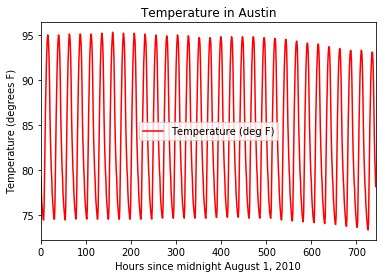

In [10]:
# -----------------------------------------------------------------------> Plotting series using pandas
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
# Read in all the data
# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv'
# urlretrieve(filename,'NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv')
df = pd.read_csv('NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv', index_col='DATE', parse_dates=True)
# pull out only August data, only hourly temperature data, so the plot is less confusing
df = df.loc['2010-Aug']
df = df[['HLY-TEMP-NORMAL']]
# Clean up column label and index, to simplify lesson, we are not ready to talk about DateTime objects yet.
df.columns = ['Temperature (deg F)']
df.reset_index(inplace=True,drop=True)

df.head()


# ---------------------------------

# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

,Temperature (deg F),Dew Point (deg F),Pressure (atm)
0,79.0,70.8,1.0
1,77.4,71.2,1.0
2,76.4,71.3,1.0
3,75.7,71.4,1.0
4,75.1,71.4,1.0


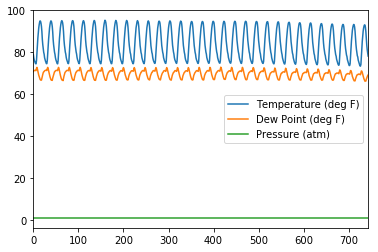

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218197CC4A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002181983F0F0>], dtype=object)

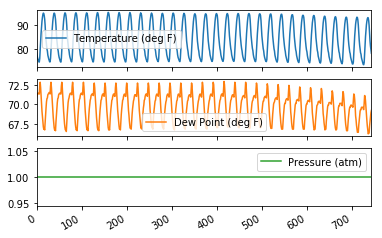

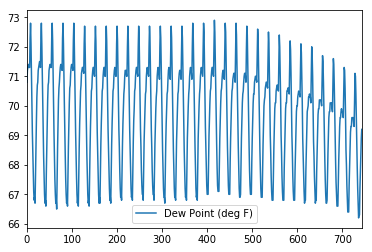

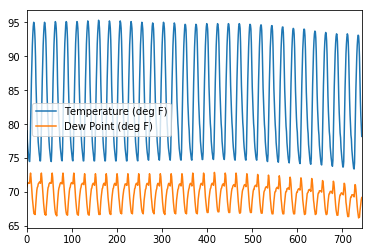

In [11]:
# -----------------------------------------------------------------------> Plotting DataFrames

df = pd.read_csv('NCDC_NOAA_HOURLY_DATA_AUSTIN_2010_794719.csv', index_col='DATE', parse_dates=True)
df = df.loc['2010-Aug']
df = df[['HLY-TEMP-NORMAL','HLY-DEWP-NORMAL','HLY-PRES-NORMAL']]
df.columns = ['Temperature (deg F)', 'Dew Point (deg F)', 'Pressure (atm)']
df.reset_index(inplace=True,drop=True)

df.head()

#---------------------------------------

# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()



# Exploratory data analysis

,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994


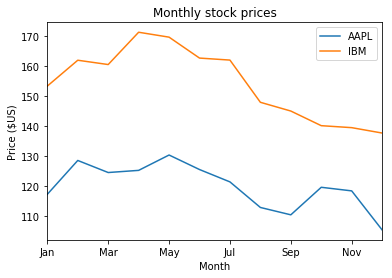

In [12]:
# -----------------------------------------------------------------------> pandas line plots

#pre_code

from urllib.request import urlretrieve
import pandas as pd

# filename = 'http://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/monthly_stocks.csv'
# urlretrieve(filename, "montly_stocks.csv")
df = pd.read_csv('montly_stocks.csv')

df.head()
# --------------------------------

import matplotlib.pyplot as plt

# Create a list of y-axis column names: y_columns
y_columns = ['AAPL', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()



,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


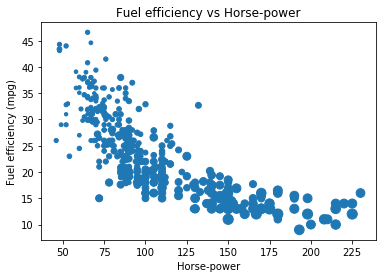

In [13]:
# -----------------------------------------------------------------------> pandas scatter plots

from urllib.request import urlretrieve
import pandas as pd

# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/auto-mpg.csv'
# urlretrieve(filename, 'auto-mpg.csv')


# Import pandas as pd and matplotlib.pyplot as plt
# Read the filename using pd.read_csv() into a DataFrame: df

df = pd.read_csv('auto-mpg.csv')

#The size of each circle is provided as a NumPy array called,This array contains the normalized 'weight' of each automobile in the dataset.

sizes = ((df['weight']/df['weight'].max()).values ** 2)*110  
                                                        
df.head()
    # -----------------------------------------------

import matplotlib.pyplot as plt

# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()




weight       Axes(0.125,0.125;0.352273x0.755)
mpg       Axes(0.547727,0.125;0.352273x0.755)
dtype: object

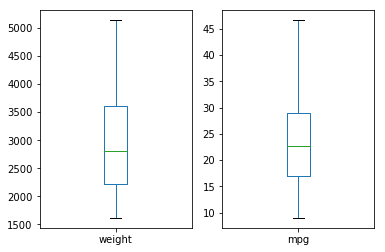

In [14]:
# ----------------------------------------------------------------------->pandas box plots

# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True )

# Display the plot
plt.show()


,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


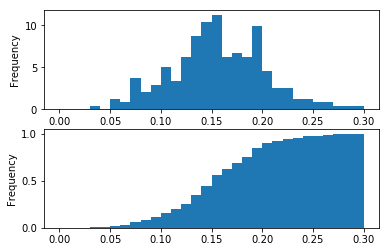

In [15]:
# -----------------------------------------------------------------------> pandas hist, pdf and cdf

from urllib.request import urlretrieve
import pandas as pd

# filename = 'http://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/tips.csv'
# urlretrieve(filename, 'tips.csv')

df = pd.read_csv('tips.csv')
# ----------------------------------------

df.head()

# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', bins=30, normed=True, range=(0,.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', bins=30, normed=True, cumulative=True, range=(0,.3))
plt.show()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


0.8
19.0


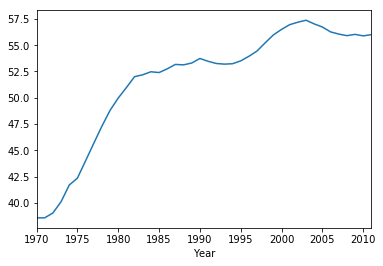

In [16]:
# -----------------------------------------------------------------------> Bachelor's degrees awarded to women

from urllib.request import urlretrieve
import pandas as pd

# filename = 'http://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/percent-bachelors-degrees-women-usa.csv'
# urlretrieve(filename, 'percent-bachelors-degrees-women-usa.csv')

df = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
df = df.set_index('Year')
# -------------------------------------------

df.head()

# Print the minimum value of the Engineering column
print(df.Engineering.min())

# Print the maximum value of the Engineering column
print(df.Engineering.max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


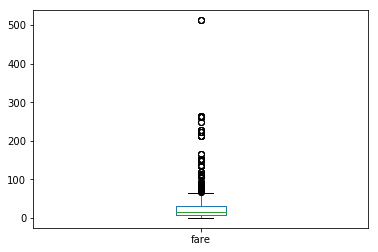

In [17]:
# -----------------------------------------------------------------------> Median vs mean

from urllib.request import urlretrieve
import pandas as pd
# filename ='http://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/titanic.csv'
# urlretrieve(filename, 'titanic.csv')

df = pd.read_csv('titanic.csv')

df.head()

# ----------------------

# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot(kind='box')

# Show the plot
plt.show()



,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


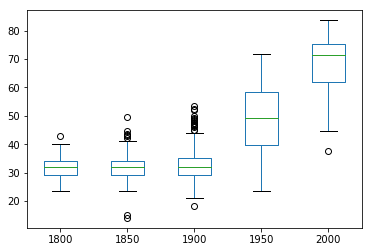

In [18]:
# -----------------------------------------------------------------------> Quantiles

from urllib.request import urlretrieve
import pandas as pd

# filename = 'http://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/life_expectancy_at_birth.csv'
# urlretrieve(filename, 'life_expectancy_at_birth.csv')

df = pd.read_csv('life_expectancy_at_birth.csv')

df.head()

# ------------------------------------


# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

In [19]:
# -----------------------------------------------------------------------> Standard deviation of temperature

from urllib.request import urlretrieve
import pandas as pd

#precode

# df1 = 'http://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/march_temp.csv'
# urlretrieve(df1, 'march_temp.csv')

# df2 = 'http://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/january_temp.csv'
# urlretrieve(df2, 'january_temp.csv')

january = pd.read_csv('january_temp.csv', names=['Date', 'Temperature'])
january.head()
march = pd.read_csv('march_temp.csv', names=['Date', 'Temperature'])
march.head()

# ------------------------------------

# Print the mean of the January and March data
print(january.mean(), march.mean())

# Print the standard deviation of the January and March data
print(january.std(), march.std())


,Date,Temperature
0,2013-01-01,28
1,2013-01-02,21
2,2013-01-03,24
3,2013-01-04,28
4,2013-01-05,30


,Date,Temperature
0,2013-03-01,28
1,2013-03-02,26
2,2013-03-03,24
3,2013-03-04,28
4,2013-03-05,32


Temperature    32.354839
dtype: float64 Temperature    35.0
dtype: float64
Temperature    13.583196
dtype: float64 Temperature    7.478859
dtype: float64


In [20]:
# -----------------------------------------------------------------------> Separate and summarize

df = pd.read_csv('auto-mpg.csv')
df.head()

# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df['origin'] == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


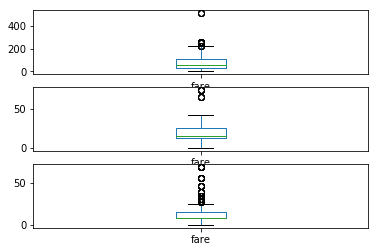

In [21]:
# -----------------------------------------------------------------------> Separate and plot

titanic = pd.read_csv('titanic.csv') 
titanic.head()

# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0],  y ='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1],  y ='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2],  y ='fare', kind='box')

# Display the plot
plt.show()

# Time series in pandas

In [22]:
# -----------------------------------------------------------------------> Creating and using a DatetimeIndex

from urllib.request import urlretrieve
import pandas as pd

# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/weather_data_austin_2010.csv'
# urlretrieve(filename, 'weather_data_austin_2010.csv')

df = pd.read_csv('weather_data_austin_2010.csv')

# extract out the temperature and date columns as lists
temperature_list = list(df.Temperature)
date_list = list(df.Date)

# -------------------------------------

# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

time_series.head()


2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

In [23]:
# -----------------------------------------------------------------------> Partial string indexing and slicing

df = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)
ts0 = df['Temperature']

# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['July 4th, 2010']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']


In [24]:
# -----------------------------------------------------------------------> Reindexing the Index

# Create Series that includes weekends
dates1 = pd.to_datetime(['2016-07-01', '2016-07-02','2016-07-03', '2016-07-04','2016-07-05','2016-07-06',
                         '2016-07-07','2016-07-08', '2016-07-09','2016-07-10', '2016-07-11','2016-07-12',
                         '2016-07-13','2016-07-14','2016-07-15', '2016-07-16','2016-07-17'])
data1 = range(len(dates1))
ts1 = pd.Series(data1, index=dates1)

# Create Series that does NOT include weekends
dates2 = pd.to_datetime(['2016-07-01', '2016-07-04','2016-07-05','2016-07-06','2016-07-07','2016-07-08',
                         '2016-07-11','2016-07-12','2016-07-13','2016-07-14','2016-07-15'])

data2 = range(len(dates2))
ts2 = pd.Series(data2, index=dates2)

# -----------------------------------------------------

ts1
ts2

# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)
ts3
# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')
ts4
# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2
sum12
# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3
sum13
# Combine ts1 + ts4: sum14
sum14 = ts1 +ts4
sum14



2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
dtype: int32

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int32

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     1.0
2016-07-05     2.0
2016-07-06     3.0
2016-07-07     4.0
2016-07-08     5.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11     6.0
2016-07-12     7.0
2016-07-13     8.0
2016-07-14     9.0
2016-07-15    10.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

2016-07-01     0
2016-07-02     0
2016-07-03     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-09     5
2016-07-10     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
2016-07-16    10
2016-07-17    10
dtype: int32

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     4
2016-07-05     6
2016-07-06     8
2016-07-07    10
2016-07-08    12
2016-07-09    13
2016-07-10    14
2016-07-11    16
2016-07-12    18
2016-07-13    20
2016-07-14    22
2016-07-15    24
2016-07-16    25
2016-07-17    26
dtype: int32

In [25]:
# -----------------------------------------------------------------------> Resampling and frequency

import pandas as pd

df=pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True) 

df.head()
# --------------------------

# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6H').mean()
df1.head()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
df2.head()




,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

In [28]:
# -----------------------------------------------------------------------> Separating and resampling

# Extract temperature data for August: august
august = df.Temperature.loc['2010-08']
august.head()
# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()
august_highs.head()
# Extract temperature data for February: february
february = df.Temperature.loc['2010-02']
february.head()
# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()
february_lows.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

Date
2010-02-01 00:00:00    47.8
2010-02-01 01:00:00    46.8
2010-02-01 02:00:00    46.1
2010-02-01 03:00:00    45.5
2010-02-01 04:00:00    44.9
Name: Temperature, dtype: float64

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

,smoothed,unsmoothed
Date,,
2010-08-01 00:00:00,NaN,79.0
2010-08-01 01:00:00,NaN,77.4
2010-08-01 02:00:00,NaN,76.4
2010-08-01 03:00:00,NaN,75.7
2010-08-01 04:00:00,NaN,75.1
2010-08-01 05:00:00,NaN,74.6
2010-08-01 06:00:00,NaN,74.5
2010-08-01 07:00:00,NaN,76.0
2010-08-01 08:00:00,NaN,79.8


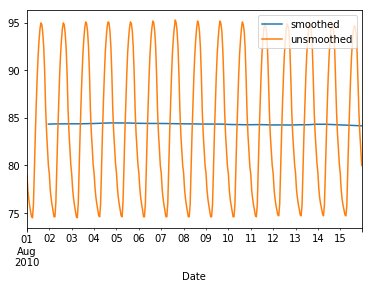

In [32]:
# -----------------------------------------------------------------------> Rolling mean and frequency

# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature'].loc['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})
august



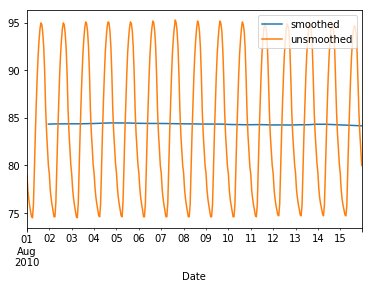

In [34]:
# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [35]:
# -----------------------------------------------------------------------> Resample and roll with it
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean() 
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64

In [41]:
# -----------------------------------------------------------------------> Method chaining and filtering
from urllib.request import urlretrieve
import pandas as pd
filename= 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/austin_airport_departure_data_2015_july.csv'
urlretrieve(filename, 'austin_airport_departure_data_2015_july.csv' )
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', skiprows=range(0,15), parse_dates=True, index_col='Date (MM/DD/YYYY)')

# --------------------------------------

# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')
dallas.head()

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()
daily_departures

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
stats

('austin_airport_departure_data_2015_july.csv',
 <http.client.HTTPMessage at 0x2181b5ff5f8>)

Date (MM/DD/YYYY)
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01     True
Name: Destination Airport, dtype: object

Date (MM/DD/YYYY)
2015-07-01    10
2015-07-02    10
2015-07-03    11
2015-07-04     3
2015-07-05     9
2015-07-06    10
2015-07-07    10
2015-07-08    10
2015-07-09    10
2015-07-10    11
2015-07-11     5
2015-07-12     9
2015-07-13    10
2015-07-14    10
2015-07-15    10
2015-07-16    10
2015-07-17    11
2015-07-18     5
2015-07-19     9
2015-07-20    10
2015-07-21    10
2015-07-22    10
2015-07-23    10
2015-07-24    11
2015-07-25     5
2015-07-26     9
2015-07-27    10
2015-07-28    10
2015-07-29    10
2015-07-30    10
2015-07-31    11
dtype: int64

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

In [42]:
# -----------------------------------------------------------------------> Missing values and interpolation

# Create Series that includes weekends
dates1 = pd.to_datetime(['2016-07-01', '2016-07-02','2016-07-03', '2016-07-04','2016-07-05','2016-07-06', 
                         '2016-07-07','2016-07-08', '2016-07-09','2016-07-10', '2016-07-11','2016-07-12', 
                         '2016-07-13','2016-07-14','2016-07-15', '2016-07-16','2016-07-17'])

data1 = range(len(dates1))
ts1 = pd.Series(data1, index=dates1)
# Create Series that does NOT include weekends
dates2 = pd.to_datetime(['2016-07-01', '2016-07-04','2016-07-05','2016-07-06','2016-07-07','2016-07-08',
                         '2016-07-11','2016-07-12','2016-07-13','2016-07-14','2016-07-15'])

data2 = range(len(dates2))
ts2 = pd.Series(data2, index=dates2)

# -------------------------------------------

# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1-ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())


count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


In [46]:
# ----------------------------------------------------------------------->

df = pd.read_csv('austin_airport_departure_data_2015_july.csv', skiprows=range(0,15), parse_dates=True)
df.columns = df.columns.str.strip()

# ----------------------------------------

# Buid a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'
mask.head()

# Use the mask to subset the data: la
la = df[mask]
la.head()

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)']+ ' ' + la['Wheels-off Time'] )
times_tz_none.head()


# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')


# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
times_tz_pacific.head()



0    False
1    False
2    False
3    False
4    False
Name: Destination Airport, dtype: bool

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
33,WN,07/01/2015,1249.0,N430WN,LAX,05:30,05:29,185.0,173.0,-1.0,05:43,14.0,0.0,0.0,0.0,0.0,0.0,NaN
55,WN,07/01/2015,4924.0,N757LV,LAX,16:00,16:15,185.0,169.0,15.0,16:27,12.0,0.0,0.0,0.0,0.0,0.0,NaN
91,WN,07/02/2015,1249.0,N570WN,LAX,05:30,05:38,185.0,171.0,8.0,05:47,9.0,0.0,0.0,0.0,0.0,0.0,NaN
113,WN,07/02/2015,4924.0,N379SW,LAX,16:00,16:07,185.0,173.0,7.0,16:23,16.0,0.0,0.0,0.0,0.0,0.0,NaN
134,WN,07/03/2015,1249.0,N487WN,LAX,05:10,05:16,185.0,174.0,6.0,05:30,14.0,0.0,0.0,0.0,0.0,0.0,NaN


33    2015-07-01 05:43:00
55    2015-07-01 16:27:00
91    2015-07-02 05:47:00
113   2015-07-02 16:23:00
134   2015-07-03 05:30:00
dtype: datetime64[ns]

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

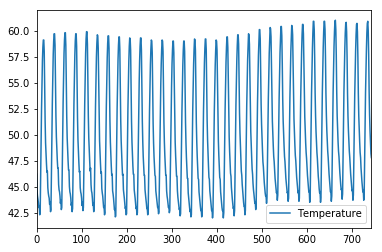

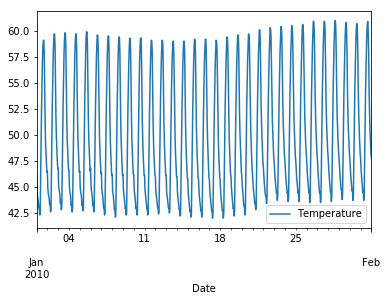

In [48]:
# -----------------------------------------------------------------------> otting time series, datetime indexing


df = pd.read_csv('weather_data_austin_2010.csv')

df = df[['Temperature','Date']]
df = df.loc[0:31*24]


# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

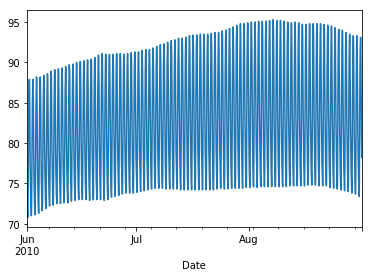

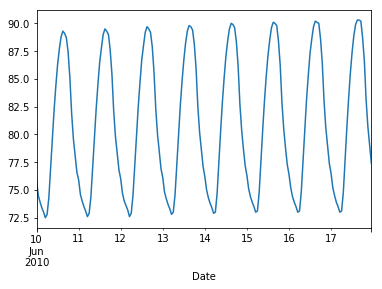

In [53]:
# -----------------------------------------------------------------------> Plotting date ranges, partial indexing
df = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col='Date')


# Plot the summer data
df.Temperature.loc['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature.loc['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()

# Case Study - Sunlight in Austin

In [58]:
# -----------------------------------------------------------------------> Reading in a data file
from urllib.request import urlretrieve
# filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1639/datasets/NOAA_QCLCD_2011_hourly_13904.txt'
# urlretrieve(filename, 'data.csv')

# --------------------------------

# Import pandas
import pandas as pd

# Read in the data file: df
df = pd.read_csv('data.csv')

# Print the output of df.head()
df.head()

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv('data.csv', header=None)

# Print the output of df_headers.head()
df_headers.head()



('data.csv', <http.client.HTTPMessage at 0x2181b5f0cf8>)

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [57]:
# -----------------------------------------------------------------------> Re-assigning column names

# define the column labels for the real data file from NOAA: column_labels
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
                
# define the sub-set list of columns to drop
list_to_drop = [ 'sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag',
                 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag',
                 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character',
                 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency',
                 'presschange','presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip',  'hourly_precipFlag', 'altimeter',
                 'record_type', 'altimeterFlag', 'junk']

# -------------------------

# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(",")

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
1,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
3,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
4,13904,20110101,553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


In [60]:
# -----------------------------------------------------------------------> Cleaning and tidying datetime data

# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
df_clean.head()



,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
2011-01-01 05:53:00,13904,20110101,0553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


In [62]:
# -----------------------------------------------------------------------> Cleaning the numeric columns

# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren']

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren']

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] =pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

In [63]:
# -----------------------------------------------------------------------> Signal min, max, median

# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-01-01':'2011-Jan-31', 'dry_bulb_faren' ].median())

72.0
78.0
48.0


In [65]:
# ----------------------------------------------------------------------->Signal variance

df_climate = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col='Date')

# ---------------------

# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.330083921569873


In [66]:
# -----------------------------------------------------------------------> Sunny or cloudy


# Select days that are sunny: sunny
sunny = df_clean['sky_condition'].str.contains('CLR')

# Select days that are overcast: overcast
overcast = df_clean['sky_condition'].str.contains('OVC')

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = df_clean[sunny].resample('D').max()
overcast_daily_max = df_clean[overcast].resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())





Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


In [68]:
# ----------------------------------------------------------------------->Sunny or cloudy

# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition']=='CLR']

# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


In [ ]:
# ----------------------------------------------------------------------->

In [ ]:
# ----------------------------------------------------------------------->

In [ ]:
# ----------------------------------------------------------------------->